<a href="https://colab.research.google.com/github/PedroTapia98/PracticaGravimetrica/blob/main/Anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica de Gravimetría

Bibliotecas para poder hacer el cálculo de las anomalías

In [1]:
from math import acos, cos, sin, radians
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
#Lectura de datos
datos= pd.read_excel('/content/drive/MyDrive/PRÁCTICA_GRAVI.xlsx')
df = pd.DataFrame(datos)
df

,LINEA,ESTACION,LATITUD,LONGITUD,ELEVst_m,GRAV.
0,G01,G0100,19.398680,101.639630,2333.80,2049.640
1,G01,G0101,19.398937,101.639127,2336.23,2048.960
2,G01,G0102,19.399287,101.638217,2340.86,2048.461
3,G01,G0103,19.399053,101.638663,2338.57,2048.763
4,G01,G0104,19.399427,101.637763,2343.84,2048.425
...,...,...,...,...,...,...
150,G12,G1204,19.397367,101.636570,2370.84,2041.431
151,G12,G1203,19.397123,101.637067,2367.45,2041.121
152,G12,G1202,19.396943,101.637467,2363.34,2040.993
153,G12,G1201,19.396770,101.637887,2356.43,2040.949


Pasaremos los valores de latitud, latitud, elevación y de gravedad de valores de cadena de texto a valores numéricos. Posteriormente transformaremos los valores de latitud y longitud a radianes

In [3]:
df['LATITUD']=pd.to_numeric(df['LATITUD'],errors='coerce')
lat = df['LATITUD']
latitud = np.radians(lat)
latitud

0      0.338571
1      0.338575
2      0.338581
3      0.338577
4      0.338584
         ...   
150    0.338548
151    0.338544
152    0.338541
153    0.338538
154    0.338535
Name: LATITUD, Length: 155, dtype: float64

In [47]:
df['LONGITUD']=pd.to_numeric(df['LONGITUD'],errors='coerce')
lon = df['LONGITUD']
longitud = np.radians(lon)
longitud

0      1.773946
1      1.773937
2      1.773922
3      1.773929
4      1.773914
         ...   
150    1.773893
151    1.773901
152    1.773908
153    1.773916
154    1.773923
Name: LONGITUD, Length: 155, dtype: float64

In [48]:
df['ELEVst_m']=pd.to_numeric(df['ELEVst_m'],errors='coerce')
elev = df['ELEVst_m']
df['GRAV.']=pd.to_numeric(df['GRAV.'],errors='coerce')
g = df['GRAV.']

Calculamos la gravedad teórica

In [49]:
gt =9.780318*(1+(5.3024*10**-3)*np.sin(latitud)+(5.9*10**-6)*2*(np.sin(latitud)))
gt

0      9.797581
1      9.797581
2      9.797581
3      9.797581
4      9.797581
         ...   
150    9.797580
151    9.797579
152    9.797579
153    9.797579
154    9.797579
Name: LATITUD, Length: 155, dtype: float64

Calculamos la Corrección por Aire Libre y la Anomalía de Aire Libre

In [7]:
Dh = elev - 2332.724
Cal = 0.3086*(Dh)
Al = g + Cal - gt
Al

0      2040.174473
1      2040.244371
2      2041.174188
3      2040.769494
4      2042.057816
          ...     
150    2043.396018
151    2042.039864
152    2040.643518
153    2038.467092
154    2035.459963
Length: 155, dtype: float64

In [8]:
#Agreagamos los valores de la Anomalía de Aire Libre al dataframe
df = df.assign(Ali=Al.values)
df

,LINEA,ESTACION,LATITUD,LONGITUD,ELEVst_m,GRAV.,Ali
0,G01,G0100,19.398680,101.639630,2333.80,2049.640,2040.174473
1,G01,G0101,19.398937,101.639127,2336.23,2048.960,2040.244371
2,G01,G0102,19.399287,101.638217,2340.86,2048.461,2041.174188
3,G01,G0103,19.399053,101.638663,2338.57,2048.763,2040.769494
4,G01,G0104,19.399427,101.637763,2343.84,2048.425,2042.057816
...,...,...,...,...,...,...,...
150,G12,G1204,19.397367,101.636570,2370.84,2041.431,2043.396018
151,G12,G1203,19.397123,101.637067,2367.45,2041.121,2042.039864
152,G12,G1202,19.396943,101.637467,2363.34,2040.993,2040.643518
153,G12,G1201,19.396770,101.637887,2356.43,2040.949,2038.467092


Calculamos la Corrección de Buguer y posteriormente la Anomalia de Buguer

In [9]:
Cb= 0.4191*2670*Dh
Ab= g+Cal-Cb-gt
Ab
df = df.assign(Abs=Ab.values)
df

,LINEA,ESTACION,LATITUD,LONGITUD,ELEVst_m,GRAV.,Ali,Abs
0,G01,G0100,19.398680,101.639630,2333.80,2049.640,2040.174473,836.133701
1,G01,G0101,19.398937,101.639127,2336.23,2048.960,2040.244371,-1882.959111
2,G01,G0102,19.399287,101.638217,2340.86,2048.461,2041.174188,-7062.985404
3,G01,G0103,19.399053,101.638663,2338.57,2048.763,2040.769494,-4500.886968
4,G01,G0104,19.399427,101.637763,2343.84,2048.425,2042.057816,-10396.712836
...,...,...,...,...,...,...,...,...
150,G12,G1204,19.397367,101.636570,2370.84,2041.431,2043.396018,-40608.293634
151,G12,G1203,19.397123,101.637067,2367.45,2041.121,2042.039864,-36816.249958
152,G12,G1202,19.396943,101.637467,2363.34,2040.993,2040.643518,-32218.568634
153,G12,G1201,19.396770,101.637887,2356.43,2040.949,2038.467092,-24488.475790


In [10]:
#Exportar los datos obtenidos en formato txt
df.to_csv("anomalias4.txt",sep='\t')

Para la segunda parte que consiste en la obtención de la interoplación de los datos obtenidos, primero se instalarán e importarán las bibliotecas que usaremos

In [11]:
pip install pykrige

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 805 kB 4.3 MB/s 


In [12]:
import pykrige #biblioteca de geoestadística
from pykrige.ok import OrdinaryKriging #Kriging Ordinario con PyKrige
import pandas as pd #biblioteca de manipulación y análisis de datos
import numpy as np #biblioteca de funciones matemáticas
import matplotlib.pyplot as plt #biblioteca de generación de gráficos
plt.style.use('ggplot') #estilo para gráficos en matplotlib



Se hizo una depueración previa de los datos obtenidos, quitando los valores nulos de dataframe, ya que estos afectan al momento de hacer la interpolación 

In [14]:
datos1= pd.read_csv('/content/drive/MyDrive/anomaliasdeff1.csv')
dff = pd.DataFrame(datos1)
dff

,LATITUD,LONGITUD,ELEVst_m,GRAV.,Ali,Abs
0,19.398680,101.639630,2333.80,2049.640,2040.174473,836.133701
1,19.398937,101.639127,2336.23,2048.960,2040.244371,-1882.959111
2,19.399287,101.638217,2340.86,2048.461,2041.174188,-7062.985404
3,19.399053,101.638663,2338.57,2048.763,2040.769494,-4500.886968
4,19.399427,101.637763,2343.84,2048.425,2042.057816,-10396.712840
...,...,...,...,...,...,...
139,19.397367,101.636570,2370.84,2041.431,2043.396018,-40608.293630
140,19.397123,101.637067,2367.45,2041.121,2042.039864,-36816.249960
141,19.396943,101.637467,2363.34,2040.993,2040.643518,-32218.568630
142,19.396770,101.637887,2356.43,2040.949,2038.467092,-24488.475790


In [15]:
#Asiganción de las variables de los datos que queremos interpolar
x =dff["LONGITUD"]
y =dff["LATITUD"]
grav =dff["GRAV."]
alii =dff["Ali"]
abss = dff["Abs"]

In [16]:
x

0      101.639630
1      101.639127
2      101.638217
3      101.638663
4      101.637763
          ...    
139    101.636570
140    101.637067
141    101.637467
142    101.637887
143    101.638327
Name: LONGITUD, Length: 144, dtype: float64

In [19]:
y

0      19.398680
1      19.398937
2      19.399287
3      19.399053
4      19.399427
         ...    
139    19.397367
140    19.397123
141    19.396943
142    19.396770
143    19.396613
Name: LATITUD, Length: 144, dtype: float64

In [20]:
print(grav)

0      2049.640
1      2048.960
2      2048.461
3      2048.763
4      2048.425
         ...   
139    2041.431
140    2041.121
141    2040.993
142    2040.949
143    2040.889
Name: GRAV., Length: 144, dtype: float64


## Para el valor de la gravedad observada

Graficaremos los datos de la gravedad observada y los valores de latitud y longitud

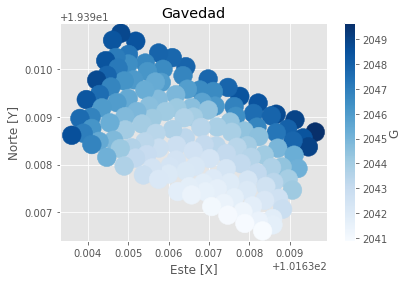

In [21]:
marker_size = 350
plt.scatter(x, y, marker_size, grav, cmap=plt.cm.Blues) #el estilo gist_rainbow es algo mas convencional.
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.title("Gavedad")
cbar = plt.colorbar()
cbar.set_label("G", labelpad=+1)
plt.show()

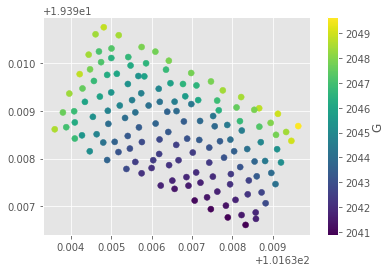

In [59]:
# Gráfico (simplificado)
plt.figure()
plt.scatter(x, y, c = grav)
cbar = plt.colorbar()
cbar.set_label("G", labelpad=+1)
plt.show()

In [23]:
#Grilla rectangular
nx,ny   = 50, 50
grid_x  = np.linspace(min(x), max(x), nx)
grid_y  = np.linspace(min(y), max(y), ny)
X,Y     = np.meshgrid(grid_x, grid_y)

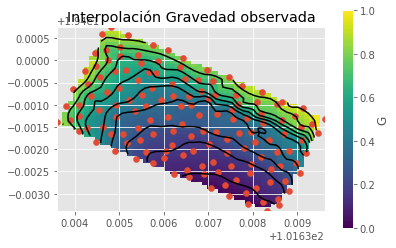

In [50]:
#Interpolación
from scipy.interpolate import griddata 

GZ = griddata(points=(x,y), values=grav, xi=(X,Y), method='cubic', fill_value=np.nan)

# Gráfico (simplificado)
plt.figure()
plt.title("Interpolación Gravedad observada")
plt.contour(X, Y, GZ, 10, colors="black")
plt.imshow(GZ , origin="lower", interpolation=None,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.scatter(x, y)
cbar = plt.colorbar()
cbar.set_label("G", labelpad=+1)
plt.show()

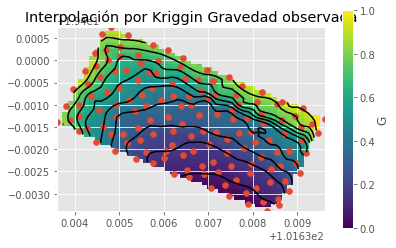

In [51]:
#Interpolación por Kriggin
from pykrige.ok import OrdinaryKriging
variogram_model  = "spherical"
coordinates_type = "geographic"
OK         = OrdinaryKriging(x, y, grav, variogram_model=variogram_model, coordinates_type=coordinates_type)
gz_int,_   = OK.execute('grid', grid_x, grid_y)
gz_int     = gz_int.data


plt.figure()
plt.title("Interpolación por Kriggin Gravedad observada")
plt.contour(X, Y, GZ, 10, colors="black")
plt.imshow(GZ , origin="lower", interpolation=None,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.scatter(x, y )
cbar = plt.colorbar()
cbar.set_label("G", labelpad=+1)
plt.show()


## Para el valor de la Anomalia de Aire Libre

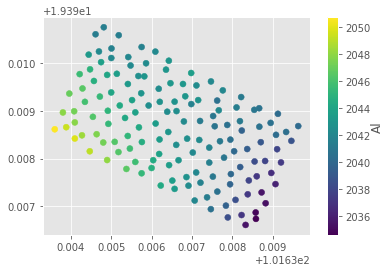

In [54]:
# Gráfico (simplificado)
plt.figure()
plt.scatter(x, y, c = alii)
cbar = plt.colorbar()
cbar.set_label("Al", labelpad=+1)
plt.show()

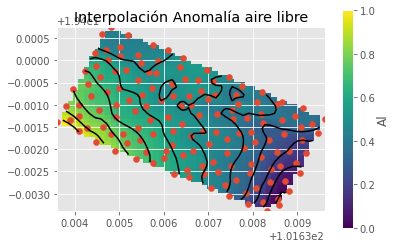

In [55]:
from scipy.interpolate import griddata 

Ali = griddata(points=(x,y), values=alii, xi=(X,Y), method='cubic', fill_value=np.nan)

# Gráfico (simplificado)
plt.figure()
plt.title("Interpolación Anomalía aire libre")
plt.contour(X, Y, Ali, 10, colors="black")
plt.imshow(Ali , origin="lower", interpolation=None,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.scatter(x, y)
cbar = plt.colorbar()
cbar.set_label("Al", labelpad=+1)
plt.show()

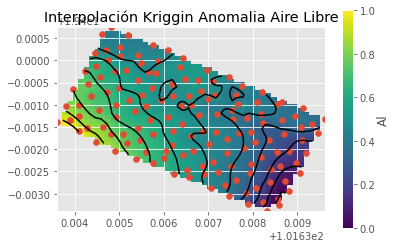

In [56]:
from pykrige.ok import OrdinaryKriging
variogram_model  = "spherical"
coordinates_type = "geographic"
OK         = OrdinaryKriging(x, y, alii, variogram_model=variogram_model, coordinates_type=coordinates_type)
gz_int,_   = OK.execute('grid', grid_x, grid_y)
gz_int     = gz_int.data


plt.figure()
plt.title("Interpolación Kriggin Anomalia Aire Libre")
plt.contour(X, Y, Ali, 10, colors="black")
plt.imshow(Ali , origin="lower", interpolation=None,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.scatter(x, y)
cbar = plt.colorbar()
cbar.set_label("Al", labelpad=+1)
plt.show()

## Para la Anomalia de Buguer

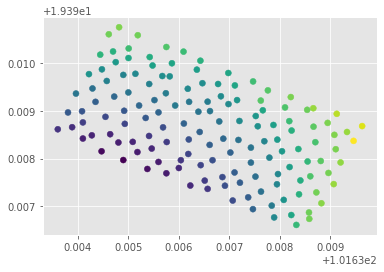

In [29]:
# Gráfico (simplificado)
plt.figure()
plt.scatter(x, y, c = abss)
plt.show()

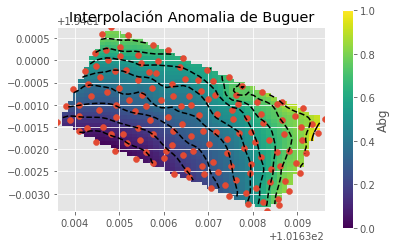

In [57]:
from scipy.interpolate import griddata 

Abss = griddata(points=(x,y), values=abss, xi=(X,Y), method='cubic', fill_value=np.nan)

# Gráfico (simplificado)
plt.figure()
plt.title("Interpolación Anomalia de Buguer")
plt.contour(X, Y, Abss, 10, colors="black")
plt.imshow(Abss , origin="lower", interpolation=None,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.scatter(x, y)
cbar = plt.colorbar()
cbar.set_label("Abg", labelpad=+1)
plt.show()

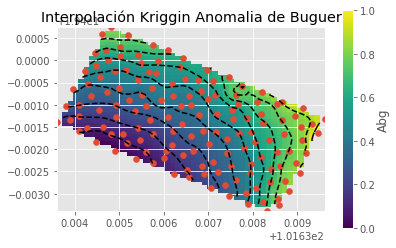

In [58]:
from pykrige.ok import OrdinaryKriging
variogram_model  = "spherical"
coordinates_type = "geographic"
OK         = OrdinaryKriging(x, y, abss, variogram_model=variogram_model, coordinates_type=coordinates_type)
gz_int,_   = OK.execute('grid', grid_x, grid_y)
gz_int     = gz_int.data


plt.figure()
plt.title("Interpolación Kriggin Anomalia de Buguer")
plt.contour(X, Y, Abss, 10, colors="black")
plt.imshow(Abss , origin="lower", interpolation=None,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
plt.scatter(x, y)
cbar = plt.colorbar()
cbar.set_label("Abg", labelpad=+1)
plt.show()